In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#1
import pandas as pd
data= pd.read_csv('https://raw.githubusercontent.com/SR1608/Datasets/main/covid-data.csv')
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,31/12/19,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,01/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,02/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,03/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,04/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [3]:
#2 a
print(data.shape)

print('Rows',len(data.axes[0]))
print('columns', len(data.axes[1]))

(57394, 49)
Rows 57394
columns 49


In [4]:
#2 b
data.dtypes

iso_code                               object
continent                              object
location                               object
date                                   object
total_cases                           float64
new_cases                             float64
new_cases_smoothed                    float64
total_deaths                          float64
new_deaths                            float64
new_deaths_smoothed                   float64
total_cases_per_million               float64
new_cases_per_million                 float64
new_cases_smoothed_per_million        float64
total_deaths_per_million              float64
new_deaths_per_million                float64
new_deaths_smoothed_per_million       float64
reproduction_rate                     float64
icu_patients                          float64
icu_patients_per_million              float64
hosp_patients                         float64
hosp_patients_per_million             float64
weekly_icu_admissions             

In [5]:
#2 c
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57394 entries, 0 to 57393
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            57071 non-null  object 
 1   continent                           56748 non-null  object 
 2   location                            57394 non-null  object 
 3   date                                57394 non-null  object 
 4   total_cases                         53758 non-null  float64
 5   new_cases                           56465 non-null  float64
 6   new_cases_smoothed                  55652 non-null  float64
 7   total_deaths                        44368 non-null  float64
 8   new_deaths                          56465 non-null  float64
 9   new_deaths_smoothed                 55652 non-null  float64
 10  total_cases_per_million             53471 non-null  float64
 11  new_cases_per_million               56401

In [6]:
#2 c
data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,5.375800e+04,56465.000000,55652.000000,4.436800e+04,56465.000000,55652.000000,53471.000000,56401.000000,55587.000000,44096.000000,...,50367.000000,33571.000000,51013.000000,52881.000000,39669.000000,39156.000000,24176.000000,45936.000000,56336.000000,49247.000000
mean,1.677974e+05,1953.576941,1920.431953,6.858639e+03,47.054317,46.835439,3139.099982,39.344804,38.403211,95.335293,...,20620.172071,12.435453,252.646642,8.070269,10.741569,32.642686,52.089636,3.089724,73.937780,0.722223
std,1.693038e+06,18269.650340,17777.391785,5.578081e+04,390.853776,378.272794,6183.455260,133.985155,101.649441,180.721699,...,20310.999832,19.427924,117.522344,4.189605,10.470743,13.453566,31.645306,2.513193,7.397016,0.153261
min,1.000000e+00,-8261.000000,-552.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2212.545000,-269.978000,0.000000,...,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.354000
25%,1.800000e+02,0.000000,0.857000,1.300000e+01,0.000000,0.000000,90.033000,0.000000,0.260000,3.977750,...,5321.444000,0.500000,156.139000,5.310000,1.900000,21.400000,21.222000,1.300000,69.870000,0.601000
50%,2.070000e+03,14.000000,19.429000,8.400000e+01,0.000000,0.286000,593.663000,2.194000,3.863000,20.383000,...,13913.839000,2.000000,238.339000,7.110000,6.400000,31.400000,52.232000,2.500000,75.345000,0.752000
75%,2.235675e+04,235.000000,245.286000,7.270000e+02,4.000000,4.000000,3487.050000,25.941000,29.678500,90.571250,...,31400.840000,18.100000,318.991000,10.390000,19.600000,40.900000,83.741000,4.200000,79.380000,0.847000
max,5.515465e+07,646281.000000,584981.857000,1.328537e+06,10600.000000,9027.714000,76541.772000,8652.658000,2472.188000,1248.014000,...,116935.600000,77.600000,724.417000,30.530000,44.000000,78.100000,98.999000,13.800000,86.750000,0.953000


In [7]:
#3 a
data.nunique()

iso_code                                215
continent                                 6
location                                216
date                                    323
total_cases                           22672
new_cases                              5432
new_cases_smoothed                    11469
total_deaths                           7704
new_deaths                             1211
new_deaths_smoothed                    2773
total_cases_per_million               37531
new_cases_per_million                 20662
new_cases_smoothed_per_million        23781
total_deaths_per_million              20046
new_deaths_per_million                 3850
new_deaths_smoothed_per_million        4588
reproduction_rate                       361
icu_patients                           1202
icu_patients_per_million               2260
hosp_patients                          2093
hosp_patients_per_million              3477
weekly_icu_admissions                   264
weekly_icu_admissions_per_millio

In [8]:
#3 b
data['continent'].value_counts()

Europe           14828
Africa           13637
Asia             13528
North America     9116
South America     3404
Oceania           2235
Name: continent, dtype: int64

In [9]:
#3 c
Meandata=data['total_cases'].mean()
print("Mean",Meandata)

maxdata=data['total_cases'].max()
print("max",maxdata)

Mean 167797.3688753302
max 55154651.0


In [10]:
#3 d
data['total_deaths'].describe()

count    4.436800e+04
mean     6.858639e+03
std      5.578081e+04
min      1.000000e+00
25%      1.300000e+01
50%      8.400000e+01
75%      7.270000e+02
max      1.328537e+06
Name: total_deaths, dtype: float64

In [11]:
data['total_deaths'].quantile(q=0.25)

13.0

In [12]:
data['total_deaths'].quantile(q=0.50)

84.0

In [13]:
data['total_deaths'].quantile(q=0.75)

727.0

In [14]:
#3 e
data.groupby('continent')['human_development_index'].agg('max')*100

continent
Africa           79.7
Asia             93.3
Europe           95.3
North America    92.6
Oceania          93.9
South America    84.3
Name: human_development_index, dtype: float64

In [15]:
#3 f
data.groupby('continent')['gdp_per_capita'].agg('max')*100

continent
Africa            2638228.7
Asia             11693560.0
Europe            9427796.5
North America     5422544.6
Oceania           4464871.0
South America     2276703.7
Name: gdp_per_capita, dtype: float64

In [16]:
##4
import pandas as pd
cols=['continent','location','date','total_cases','total_deaths','gdp_per_capita','human_development_index']
updated_data=data[cols]
updated_data

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,NaN,NaN,1803.987,0.498
1,Asia,Afghanistan,01/01/20,NaN,NaN,1803.987,0.498
2,Asia,Afghanistan,02/01/20,NaN,NaN,1803.987,0.498
3,Asia,Afghanistan,03/01/20,NaN,NaN,1803.987,0.498
4,Asia,Afghanistan,04/01/20,NaN,NaN,1803.987,0.498
...,...,...,...,...,...,...,...
57389,NaN,International,13/11/20,696.0,7.0,NaN,NaN
57390,NaN,International,14/11/20,696.0,7.0,NaN,NaN
57391,NaN,International,15/11/20,696.0,7.0,NaN,NaN
57392,NaN,International,16/11/20,696.0,7.0,NaN,NaN


In [17]:
#5 a

data[data.duplicated()]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index


In [18]:
#5 b missing valus in each column

data.isna().sum()

iso_code                                323
continent                               646
location                                  0
date                                      0
total_cases                            3636
new_cases                               929
new_cases_smoothed                     1742
total_deaths                          13026
new_deaths                              929
new_deaths_smoothed                    1742
total_cases_per_million                3923
new_cases_per_million                   993
new_cases_smoothed_per_million         1807
total_deaths_per_million              13298
new_deaths_per_million                  993
new_deaths_smoothed_per_million        1807
reproduction_rate                     19698
icu_patients                          52904
icu_patients_per_million              52904
hosp_patients                         52389
hosp_patients_per_million             52389
weekly_icu_admissions                 57037
weekly_icu_admissions_per_millio

In [19]:
#5 c

miss_con=data.dropna(subset='continent')
miss_con.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,31/12/19,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,01/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,02/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,03/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,04/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [22]:
#5 d

data = data.fillna(0)
data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,31/12/19,0.0,0.0,0.0,0.0,0.0,0.0,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,01/01/20,0.0,0.0,0.0,0.0,0.0,0.0,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,02/01/20,0.0,0.0,0.0,0.0,0.0,0.0,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,03/01/20,0.0,0.0,0.0,0.0,0.0,0.0,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,04/01/20,0.0,0.0,0.0,0.0,0.0,0.0,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57389,0,0,International,13/11/20,696.0,0.0,0.0,7.0,0.0,0.0,...,0.000,0.0,0.000,0.00,0.0,0.0,0.000,0.0,0.00,0.000
57390,0,0,International,14/11/20,696.0,0.0,0.0,7.0,0.0,0.0,...,0.000,0.0,0.000,0.00,0.0,0.0,0.000,0.0,0.00,0.000
57391,0,0,International,15/11/20,696.0,0.0,0.0,7.0,0.0,0.0,...,0.000,0.0,0.000,0.00,0.0,0.0,0.000,0.0,0.00,0.000
57392,0,0,International,16/11/20,696.0,0.0,0.0,7.0,0.0,0.0,...,0.000,0.0,0.000,0.00,0.0,0.0,0.000,0.0,0.00,0.000


In [46]:
#6 a
data['date']= pd.to_datetime(data['date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   continent                           7 non-null      object        
 1   index                               7 non-null      int64         
 2   location                            7 non-null      object        
 3   date                                7 non-null      datetime64[ns]
 4   total_cases                         7 non-null      float64       
 5   new_cases                           7 non-null      float64       
 6   new_cases_smoothed                  7 non-null      float64       
 7   total_deaths                        7 non-null      float64       
 8   new_deaths                          7 non-null      float64       
 9   new_deaths_smoothed                 7 non-null      float64       
 10  total_cases_per_million       

In [24]:
#6 b
data['Year']=pd.DatetimeIndex(data['date']).year
data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,Year
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498,2019
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498,2020
2,AFG,Asia,Afghanistan,2020-02-01,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498,2020
3,AFG,Asia,Afghanistan,2020-03-01,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498,2020
4,AFG,Asia,Afghanistan,2020-04-01,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57389,0,0,International,2020-11-13,696.0,0.0,0.0,7.0,0.0,0.0,...,0.0,0.000,0.00,0.0,0.0,0.000,0.0,0.00,0.000,2020
57390,0,0,International,2020-11-14,696.0,0.0,0.0,7.0,0.0,0.0,...,0.0,0.000,0.00,0.0,0.0,0.000,0.0,0.00,0.000,2020
57391,0,0,International,2020-11-15,696.0,0.0,0.0,7.0,0.0,0.0,...,0.0,0.000,0.00,0.0,0.0,0.000,0.0,0.00,0.000,2020
57392,0,0,International,2020-11-16,696.0,0.0,0.0,7.0,0.0,0.0,...,0.0,0.000,0.00,0.0,0.0,0.000,0.0,0.00,0.000,2020


In [33]:
#7 a
data=data.groupby('continent').agg('max')
data


,index,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,Year
continent,,,,,,,,,,,,,,,,,,,,,
0,57393,World,2020-12-11,55154651.0,646281.0,584981.857,1328537.0,10600.0,9027.714,7075.827,...,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.000,2020
Africa,56747,Zimbabwe,2020-12-11,752269.0,13944.0,12583.714,20314.0,572.0,297.429,17698.224,...,77.6,525.432,22.02,9.700,65.800,89.827,6.300,76.88,0.797,2020
Asia,56261,Yemen,2020-12-11,8874290.0,97894.0,93198.571,130519.0,2003.0,1168.000,49884.137,...,30.3,724.417,17.72,26.900,78.100,98.999,13.050,84.86,0.933,2020
Europe,55230,Vatican,2020-12-11,1991233.0,86852.0,54868.571,52147.0,2004.0,1101.000,76541.772,...,5.7,539.849,10.08,44.000,58.300,97.719,13.800,86.75,0.953,2020
North America,54477,United States Virgin Islands,2020-12-11,11205486.0,184813.0,156419.143,247220.0,4928.0,2715.143,43721.784,...,23.5,430.548,17.11,19.100,53.300,90.650,5.800,83.92,0.926,2020
Oceania,55833,Wallis and Futuna,2020-12-11,27750.0,1384.0,551.714,907.0,59.0,22.000,41672.600,...,25.1,561.494,30.53,23.500,48.800,82.502,3.840,83.44,0.939,2020
South America,55478,Venezuela,2020-12-11,5876464.0,69074.0,46393.000,166014.0,3935.0,1096.714,29170.225,...,7.1,373.159,12.54,34.200,42.900,80.635,5.000,81.44,0.843,2020


In [41]:
#7 b
data=data.reset_index()
df_groupby=data.copy()
df_groupby

,continent,index,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,Year
0,0,57393,World,2020-12-11,55154651.0,646281.0,584981.857,1328537.0,10600.0,9027.714,...,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.000,2020
1,Africa,56747,Zimbabwe,2020-12-11,752269.0,13944.0,12583.714,20314.0,572.0,297.429,...,77.6,525.432,22.02,9.700,65.800,89.827,6.300,76.88,0.797,2020
2,Asia,56261,Yemen,2020-12-11,8874290.0,97894.0,93198.571,130519.0,2003.0,1168.000,...,30.3,724.417,17.72,26.900,78.100,98.999,13.050,84.86,0.933,2020
3,Europe,55230,Vatican,2020-12-11,1991233.0,86852.0,54868.571,52147.0,2004.0,1101.000,...,5.7,539.849,10.08,44.000,58.300,97.719,13.800,86.75,0.953,2020
4,North America,54477,United States Virgin Islands,2020-12-11,11205486.0,184813.0,156419.143,247220.0,4928.0,2715.143,...,23.5,430.548,17.11,19.100,53.300,90.650,5.800,83.92,0.926,2020
5,Oceania,55833,Wallis and Futuna,2020-12-11,27750.0,1384.0,551.714,907.0,59.0,22.000,...,25.1,561.494,30.53,23.500,48.800,82.502,3.840,83.44,0.939,2020
6,South America,55478,Venezuela,2020-12-11,5876464.0,69074.0,46393.000,166014.0,3935.0,1096.714,...,7.1,373.159,12.54,34.200,42.900,80.635,5.000,81.44,0.843,2020


In [43]:
#8 
df_groupby['total_deaths_to_total_cases'] = data['total_deaths']/data['total_cases']
df_groupby

,continent,index,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,Year,total_deaths_to_total_cases
0,0,57393,World,2020-12-11,55154651.0,646281.0,584981.857,1328537.0,10600.0,9027.714,...,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.000,2020,0.024087
1,Africa,56747,Zimbabwe,2020-12-11,752269.0,13944.0,12583.714,20314.0,572.0,297.429,...,525.432,22.02,9.700,65.800,89.827,6.300,76.88,0.797,2020,0.027004
2,Asia,56261,Yemen,2020-12-11,8874290.0,97894.0,93198.571,130519.0,2003.0,1168.000,...,724.417,17.72,26.900,78.100,98.999,13.050,84.86,0.933,2020,0.014708
3,Europe,55230,Vatican,2020-12-11,1991233.0,86852.0,54868.571,52147.0,2004.0,1101.000,...,539.849,10.08,44.000,58.300,97.719,13.800,86.75,0.953,2020,0.026188
4,North America,54477,United States Virgin Islands,2020-12-11,11205486.0,184813.0,156419.143,247220.0,4928.0,2715.143,...,430.548,17.11,19.100,53.300,90.650,5.800,83.92,0.926,2020,0.022062
5,Oceania,55833,Wallis and Futuna,2020-12-11,27750.0,1384.0,551.714,907.0,59.0,22.000,...,561.494,30.53,23.500,48.800,82.502,3.840,83.44,0.939,2020,0.032685
6,South America,55478,Venezuela,2020-12-11,5876464.0,69074.0,46393.000,166014.0,3935.0,1096.714,...,373.159,12.54,34.200,42.900,80.635,5.000,81.44,0.843,2020,0.028251


<Axes: xlabel='gdp_per_capita'>

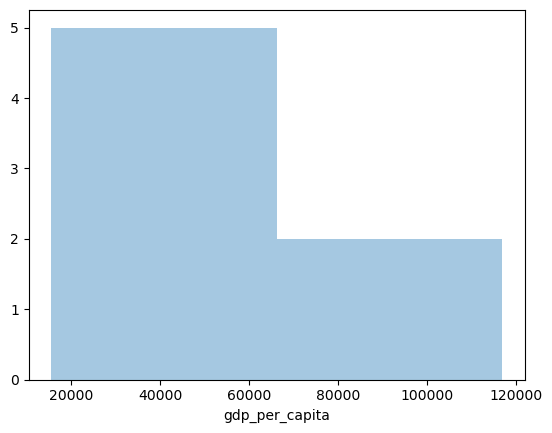

In [47]:
#9 a
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(df_groupby['gdp_per_capita'], kde=False)

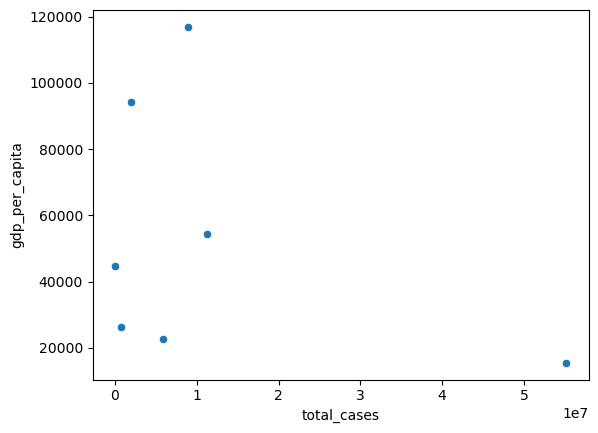

In [48]:
#9 b
fig=sns.scatterplot(x=df_groupby['total_cases'],y=df_groupby['gdp_per_capita'])
plt.show()

In [51]:
#9 c
sns.pairplot(df_groupby)

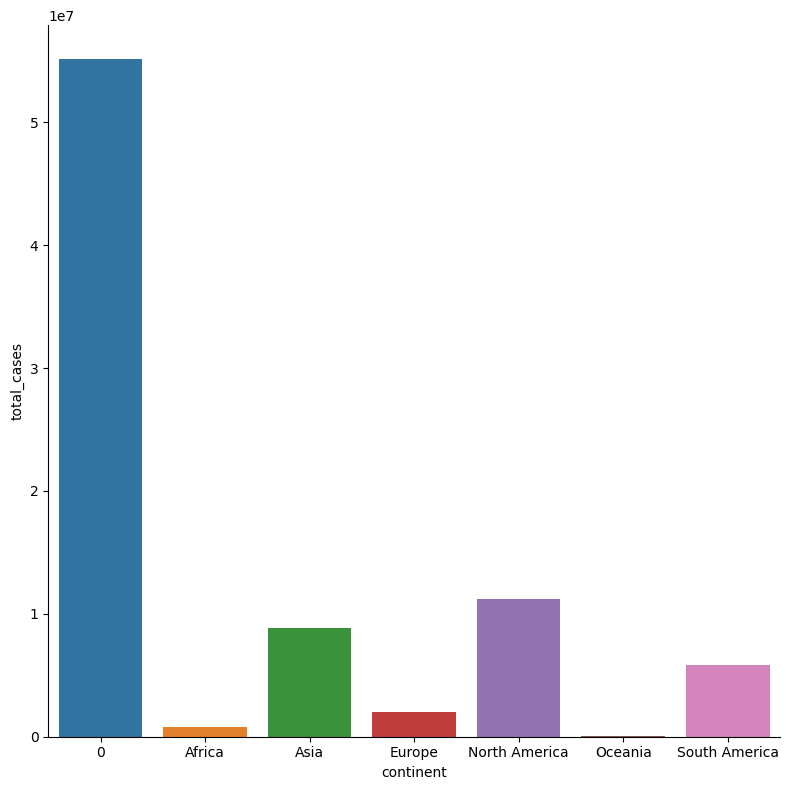

In [59]:
#9 d
sns.catplot(data=df_groupby, x='continent',y='total_cases',kind='bar',height=8)

In [53]:
#10
df_groupby.to_csv('file1.csv')